In [34]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile

In [49]:
def bernstein_vazirani_algorithm(n, secret_string):
    # Create quantum and classical registers
    qr = QuantumRegister(n+1)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr, cr)

    # Initialize the last qubit (ancilla) |-⟩
    qc.x(n)
    qc.h(n)

    # Apply Hadamard gates before querying the oracle
    qc.h(range(n))

    # Apply the oracle
    # Apply cnot to ancilla changing + to - and viceversa if q[i] is 1.
    # Ancilla changes the global phase of the quantum system
    for i in range(n):
        if secret_string[i] == '1':
            qc.cx(i, n) 

    # Apply Hadamard gates to the input register
    qc.h(range(n))

    # Measure the input register
    qc.measure(range(n), range(n-1, -1, -1))

    return qc

In [50]:
def transpile_circuit(n, secret_string):
    qc = bernstein_vazirani_algorithm(n, secret_string)
    
    # Use AerSimulator
    simulator = AerSimulator()
    
    # Transpile the circuit for the simulator
    transpiled_qc = transpile(qc, simulator)
    
    # Run the simulation
    job = simulator.run(transpiled_qc, shots=500)
    result = job.result()
    counts = result.get_counts()

    # Plot the results
    display(plot_histogram(counts))
    
    # Get the most frequent result
    most_frequent = max(counts, key=counts.get)
    
    return most_frequent

Secret string: 1011


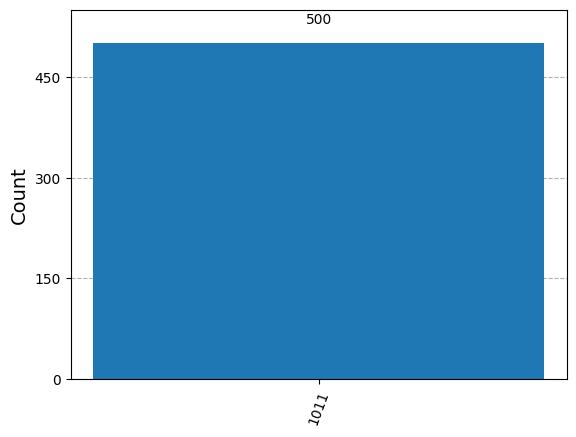

Algorithm output: 1011
Success: True


In [51]:
# Example usage
n = 4  # number of qubits (excluding ancilla)

secret_string = '1011'  # the secret string to be discovered

print(f"Secret string: {secret_string}")
result = transpile_circuit(n, secret_string)
print(f"Algorithm output: {result}")
print(f"Success: {result == secret_string}")